<a href="https://colab.research.google.com/github/mohammaddjalili/A-simple-CNN-model-to-detect-circles-triangles-and-rectangles-using-Tensorflow/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/c(ontent/drive/MyDrive/q4/Shapes/Circle")
!ls
from PIL import Image
import os

folder_path = "/c(ontent/drive/MyDrive/q4/Shapes/Circle"
images = []

for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        images.append(img)

In [ ]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/soal4/s/S/Shapes/Rectangle"
images_Rec = []

for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        images_Rec.append(img)

In [ ]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/soal4/s/S/Shapes/Triangle"
images_Tri = []

for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        images_Tri.append(img)

In [ ]:
import random
import numpy as np

# Combine the lists of images
all_images = images + images_Rec + images_Tri

# Create labels for each category (Circle, Rectangle, Triangle)
labels_circle = [0] * len(images)
labels_rectangle = [1] * len(images_Rec)
labels_triangle = [2] * len(images_Tri)

# Combine the labels
all_labels = labels_circle + labels_rectangle + labels_triangle

# Combine images and labels into pairs
data = list(zip(all_images, all_labels))

# Shuffle the data
random.shuffle(data)

# Split the data into images and labels again
shuffled_images, shuffled_labels = zip(*data)

# Convert images to numpy arrays
shuffled_images = [tf.keras.preprocessing.image.img_to_array(img) for img in shuffled_images]
shuffled_images = np.array(shuffled_images)

# Convert labels to numpy array
shuffled_labels = np.array(shuffled_labels)

# Normalize pixel values to be between 0 and 1
shuffled_images = shuffled_images / 255.0

# Now shuffled_images and shuffled_labels can be used as your training data


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    shuffled_images, shuffled_labels, test_size=20, random_state=42)

In [ ]:
print(train_images.shape,test_images.shape)

(5980, 50, 50, 1) (20, 50, 50, 1)


Epoch 1/10
150/150 [==============================] - 6s 9ms/step - loss: 0.3985 - accuracy: 0.8223 - val_loss: 0.1235 - val_accuracy: 0.9498
Epoch 2/10
150/150 [==============================] - 1s 6ms/step - loss: 0.0281 - accuracy: 0.9937 - val_loss: 0.0074 - val_accuracy: 0.9983
Epoch 3/10
150/150 [==============================] - 1s 7ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4/10
150/150 [==============================] - 1s 7ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0024 - val_accuracy: 0.9992
Epoch 5/10
150/150 [==============================] - 1s 6ms/step - loss: 7.0259e-04 - accuracy: 0.9998 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/10
150/150 [==============================] - 1s 6ms/step - loss: 5.4948e-04 - accuracy: 0.9998 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/10
150/150 [==============================] - 1s 5ms/step - loss: 4.3195e-04 - accuracy: 0.9998 - val_loss: 0.0011 - val_accuracy: 1

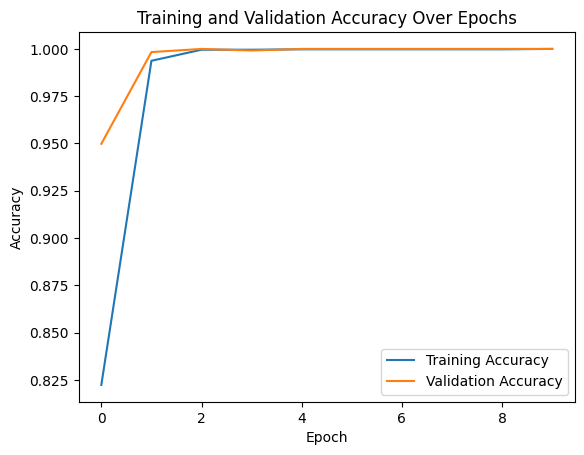

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Assuming your images are grayscale with dimensions 50x50
input_shape = (50, 50, 1)

# Define the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # Assuming 3 classes (Circle, Rectangle, Triangle)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and save the training history
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot the learning curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()


In [ ]:

# Prediction of labels for test photos
predictions = model.predict(test_images)import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt




# Convert predicted probabilities to class labels
predicted_labels = [tf.argmax(prediction).numpy() for prediction in predictions]

# Display true labels and predicted labels side by side
for true_label, predicted_label in zip(test_labels, predicted_labels):
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")


1/1 [==============================] - 0s 72ms/step - loss: 1.4865e-05 - accuracy: 1.0000
Test accuracy: 1.0
1/1 [==============================] - 1s 518ms/step
True Label: 2, Predicted Label: 2
True Label: 2, Predicted Label: 2
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 1
True Label: 2, Predicted Label: 2
True Label: 1, Predicted Label: 1
True Label: 1, Predicted Label: 1
True Label: 2, Predicted Label: 2
True Label: 2, Predicted Label: 2
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 1
True Label: 1, Predicted Label: 1
True Label: 2, Predicted Label: 2
True Label: 1, Predicted Label: 1
